<div class="alert alert-info">
<h1><center><font color=darkblue> PREPROCESAMIENTO DF DATOS DE FILIACION <font></center></h1>


</div>

In [1]:
pwd

'/Users/fernandomarquez/Documents/Fleni/Investigacion/Modelo EMCS/Modelo 3 - Mes1'

In [1]:
#Carga de las librerías y datasets utilizados
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import sklearn


df= pd.read_excel('df_git.xlsx')#,parse_dates=[])

<div class="alert alert-info">
<h1><center><font color=darkblue> FEATURE SELECTION <font></center></h1>


</div>

# Correlaciones de Spearman estdisticamente significativas
http://scielo.sld.cu/scielo.php?script=sci_arttext&pid=S1729-519X2009000200017

Escala 3:

* Perfecta R = 1
* Excelente R = 0.9 < = R < 1
* Buena R = 0.8 < = R < 0.9
* Regular R = 0.5 < = R < 0.8
* Mala R < 0.5

Escala 4: Rango Relación

* 0 – 0,25: Escasa o nula
* 0,26-0,50: Débil
* 0,51- 0,75: Entre moderada y fuerte
* 0,76- 1,00: Entre fuerte y perfecta 5

In [2]:
df_corr=df[['edad',#'edad_map','edad_map1', 
           'genero',# 'etiologia','conciencia_i', 
           'evolucion',
           'LOS', 
           'seguimiento',
            'improbable30',
           'CRSi_A', 'CRSi_V', 'CRSi_M', 'CRSi_Ve', 'CRSi_C', 'CRSi_Ar','CRSi_T',
           'JFK_A', 'JFK_V', 'JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_Ar','JFK_T',
           'variacion_CRS_A','variacion_CRS_V', 'variacion_CRS_M','variacion_CRS_Ve','variacion_CRS_C', 'variacion_CRS_Ar','variacion_CRS_T',
           'vel_var_CRS_A','vel_var_CRS_V', 'vel_var_CRS_M','vel_var_CRS_Ve','vel_var_CRS_C', 'vel_var_CRS_Ar', 'vel_var_CRS',
           'EMERGENCIA'
               ]]

KeyError: "['genero'] not in index"

In [137]:
#Definir funciones estadisticas
from scipy.stats import kendalltau, pearsonr, spearmanr
def kendall_pval(x,y):
    return kendalltau(x,y)[1]
def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]
def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

spearman_p=df_corr.corr(method=spearmanr_pval)
spearman_p_EMCS=spearman_p.loc[spearman_p['EMERGENCIA'] <= 0.05]
print(spearman_p_EMCS.index.values.tolist())

['LOS', 'improbable30', 'CRSi_V', 'CRSi_M', 'CRSi_C', 'CRSi_T', 'JFK_A', 'JFK_V', 'JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_T', 'variacion_CRS_A', 'variacion_CRS_V', 'variacion_CRS_M', 'variacion_CRS_Ve', 'variacion_CRS_C', 'variacion_CRS_T', 'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS_M', 'vel_var_CRS_Ve', 'vel_var_CRS_C', 'vel_var_CRS']


In [138]:
#Seleccion de variables con correlacion estadisticamente significativa con EMCS
df_corr_spearmanES=df_corr[['LOS', 'improbable30',
                            'CRSi_V', 'CRSi_M', 'CRSi_C', 'CRSi_T', 'JFK_A', 'JFK_V', 'JFK_M', 'JFK_Ve', 
                          'JFK_C', 'JFK_T', 'variacion_CRS_A', 'variacion_CRS_V', 'variacion_CRS_C', 
                          'variacion_CRS_M', 'variacion_CRS_Ve', 'variacion_CRS_T', 
                          'EMERGENCIA']].corr(method='spearman')

#df_corr_spearmanES[['EMERGENCIA']].sort_values(by='EMERGENCIA', ascending=False)

#Correlacion de todas las variables
todas=df_corr.corr(method='spearman')
#todas[['EMERGENCIA']].sort_values(by='EMERGENCIA', ascending=False)

# Correlaciones entre variables relevantes
todas[['JFK_T']].sort_values(by='JFK_T', ascending=False)
#todas[['JFK_V']].sort_values(by='JFK_V', ascending=False)
#todas[['JFK_C']].sort_values(by='JFK_C', ascending=False)
#todas[['JFK_M']].sort_values(by='JFK_M', ascending=False)

#CORRELACIONES CON IMPROBABLES
todas[['EMERGENCIA']].sort_values(by='EMERGENCIA', ascending=False)

,EMERGENCIA
EMERGENCIA,1.000000
JFK_T,0.592741
JFK_V,0.566856
JFK_C,0.539373
JFK_M,0.511276
CRSi_V,0.470088
JFK_A,0.464176
variacion_CRS_C,0.460528
vel_var_CRS_C,0.460033
variacion_CRS_T,0.424575


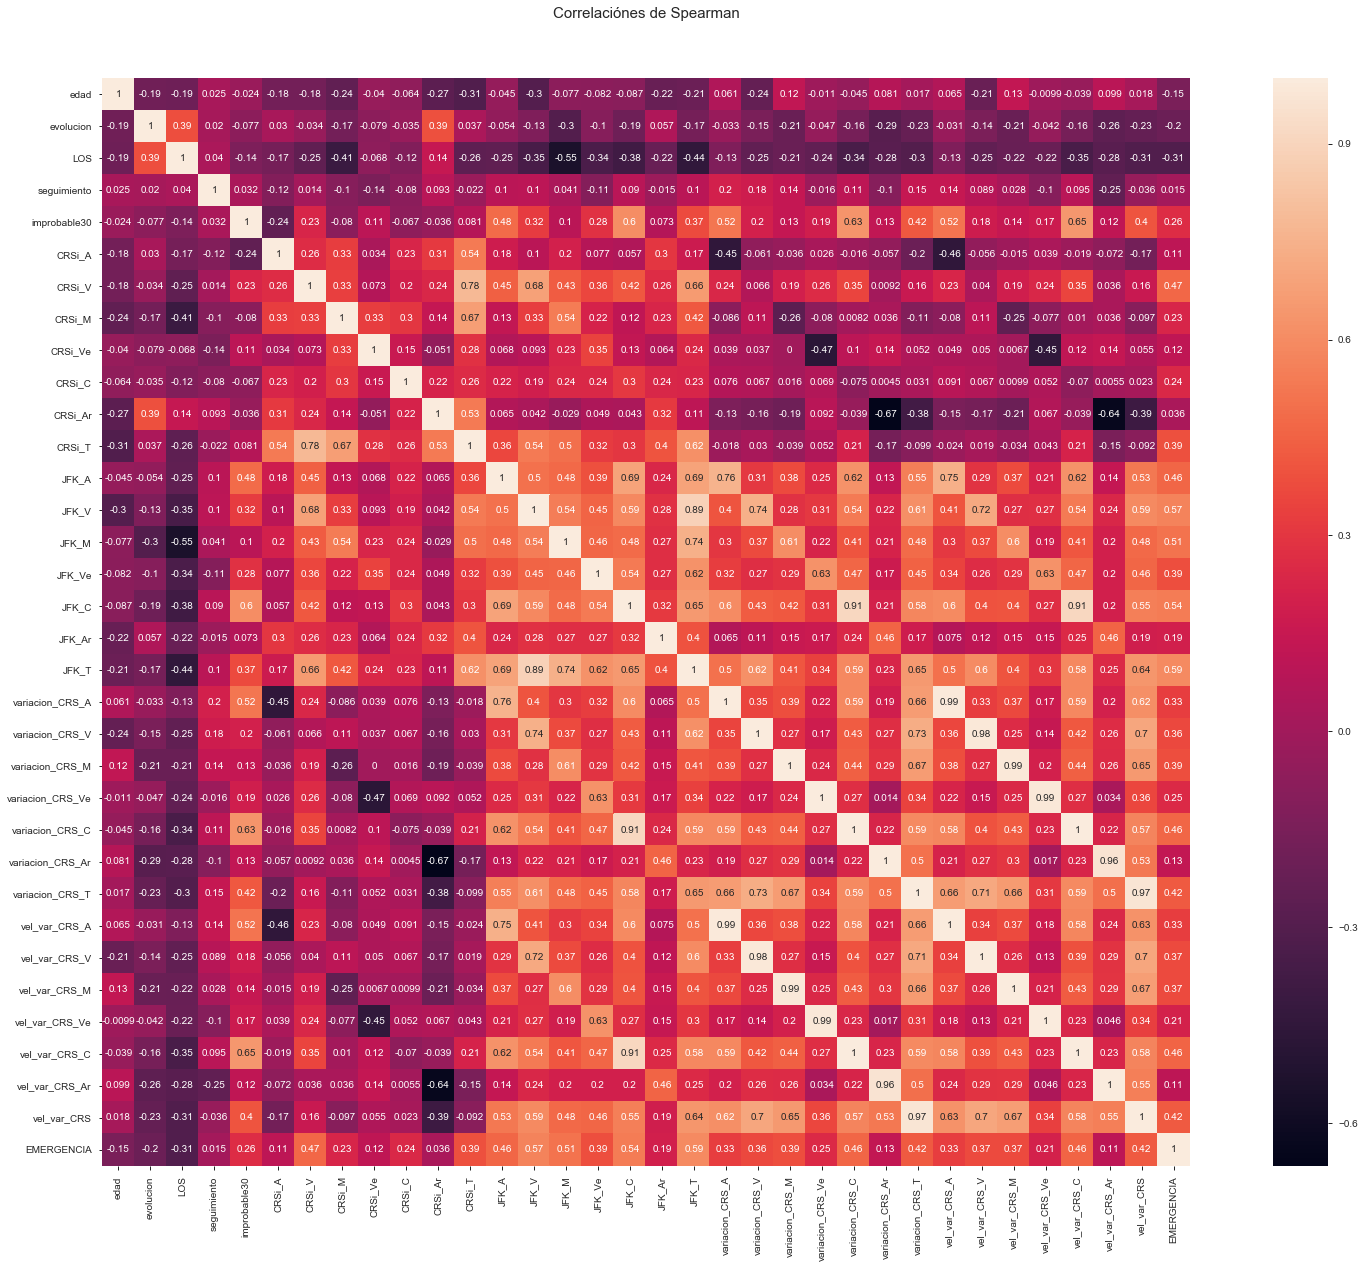

<Figure size 576x396 with 0 Axes>

In [139]:
#set(font_scale=1)
plt.figure(figsize=(30,20))
plt.title('Correlaciónes de Spearman', y=1.05, size=15)
sns.heatmap(df_corr.corr(method='spearman'), annot=True, square=True, #cmap=plt.cm.Reds
        )
plt.show()
plt.savefig("heatmap_spearman_all.png")

# MinMax Scaler

In [140]:
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit_transform(df_MinMax)
#plt.figure(figsize=(15,10))
#sns.heatmap(df_MinMax.corr(method='spearman'), annot=True, square=True,)

In [141]:
from IPython.display import Markdown as md

#md(f"Las variables con correlación moderada con EMCS (rho Spearman >0.5) fueron: {spearman_mayor5EMCS}")

# Correlaciones de Pearson

In [142]:
#seleccion_pearson=df.corr(method=pearsonr_pval)
#seleccion_pearson=seleccion_pearson.loc[seleccion_pearson['EMERGENCIA'] <= 0.05]
#print(seleccion_pearson.index.values.tolist())

In [143]:
# Creacion de DF con correlaciones de spearman estadisticamente significativas
#df_corr_pearson=df[['CRSi_A', 'CRSi_V', 'CRSi_C', 'CRSi_T', 
 #                   'JFK_A', 'JFK_V', 'JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T', 
  #                  'variacion_CRS_A', 'variacion_CRS_V', 'variacion_CRS_C', 
   #                  'variacion_CRS_Ar', 'variacion_CRS_M', 'variacion_CRS_Ve', 'variacion_CRS_T', 
    #                'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS_C', 'vel_var_CRS_Ar', 'vel_var_CRS_M', 
     #               'vel_var_CRS_Ve', 'vel_var_CRS', 
      #               'Improbable34', 'improbable', 'improbable90',
       #             'EMERGENCIA']]

#Heatmap de correlacion de PEARSON para variables de pacientes unicos que EMCS
#cor = df_corr_pearson.corr(method='pearson')

#set(font_scale=1)
#plt.figure(figsize=(25,17))
#plt.title('Correlación de PEARSON de variables', y=1.05, size=15)
#sns.heatmap(cor, annot=True, square=True, cmap=plt.cm.Reds)
#plt.show()

# Mapeos 2

In [144]:
df=pd.get_dummies(data=df, columns=['conciencia_i','genero', 'etiologia'], prefix = 'cat', drop_first=True)

In [145]:
dict_cols= {'CRSi_A':'CRSiA', 'CRSi_V':'CRSiV','CRSi_M':'CRSiM', 'CRSi_Ve':'CRSiVe', 'CRSi_C':'CRSiC', 
            'CRSi_Ar':'CRSiAr'}
#Renombrado de columnas
df_map=df.rename(columns=dict_cols)

# Recursive feature elimination with cross validation and random forest classification

https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

In [146]:
df.columns

Index(['NHC', 'alta', 'edad', 'CRSi_A', 'CRSi_V', 'CRSi_M', 'CRSi_Ve',
       'CRSi_C', 'CRSi_Ar', 'CRSi_T', 'CRSe_A', 'CRSe_V', 'CRSe_M', 'CRSe_Ve',
       'CRSe_C', 'CRSe_Ar', 'CRSe_T', 'conciencia_e', 'excluidos',
       'EMERGENCIA', 'edad_map', 'edad_map1', 'LOS', 'evolucion', 'nya',
       'JFK_A', 'JFK_V', 'JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T',
       'seguimiento', 'variacion_CRS_T', 'variacion_CRS_A', 'variacion_CRS_V',
       'variacion_CRS_C', 'variacion_CRS_Ar', 'variacion_CRS_M',
       'variacion_CRS_Ve', 'vel_var_CRS', 'vel_var_CRS_A', 'vel_var_CRS_V',
       'vel_var_CRS_C', 'vel_var_CRS_Ar', 'vel_var_CRS_M', 'vel_var_CRS_Ve',
       'Improbable1', 'Improbable2', 'Improbable3', 'Improbable4',
       'Improbable5', 'Improbable6', 'Improbable7', 'Improbable8',
       'Improbable9', 'Improbable10', 'Improbable11', 'Improbable12',
       'Improbable13', 'Improbable14', 'Improbable15', 'Improbable16',
       'Improbable17', 'Improbable18', 'Improbable19', 'Improbable

In [147]:
X=df[['edad',
      'evolucion',
      'seguimiento',
      'cat_SVSR',
      'cat_M',
      'cat_Anoxia', 'cat_TEC','cat_Tumor',
      'CRSi_A', 'CRSi_V', 'CRSi_M', 'CRSi_Ve','CRSi_C', 'CRSi_Ar', 'CRSi_T',
      'JFK_A', 'JFK_V', 'JFK_M','JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T',
      'variacion_CRS_T','variacion_CRS_A', 'variacion_CRS_V', 'variacion_CRS_C',
      'variacion_CRS_Ar', 'variacion_CRS_M', 'variacion_CRS_Ve',
      'vel_var_CRS', 'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS_C',
      'vel_var_CRS_Ar', 'vel_var_CRS_M', 'vel_var_CRS_Ve', 
      'improbable30']]
y=df[['EMERGENCIA']]

In [148]:
from sklearn.model_selection import train_test_split
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [149]:
y_train.EMERGENCIA.value_counts()

0    47
1    16
Name: EMERGENCIA, dtype: int64

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier(random_state=42,max_depth=5) 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='balanced_accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 32
Best features : Index(['edad', 'evolucion', 'seguimiento', 'cat_SVSR', 'cat_M', 'cat_TEC',
       'CRSi_A', 'CRSi_V', 'CRSi_M', 'CRSi_Ar', 'CRSi_T', 'JFK_A', 'JFK_V',
       'JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T', 'variacion_CRS_T',
       'variacion_CRS_A', 'variacion_CRS_V', 'variacion_CRS_C',
       'variacion_CRS_Ar', 'variacion_CRS_M', 'variacion_CRS_Ve',
       'vel_var_CRS', 'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS_C',
       'vel_var_CRS_Ar', 'vel_var_CRS_M', 'vel_var_CRS_Ve'],
      dtype='object')


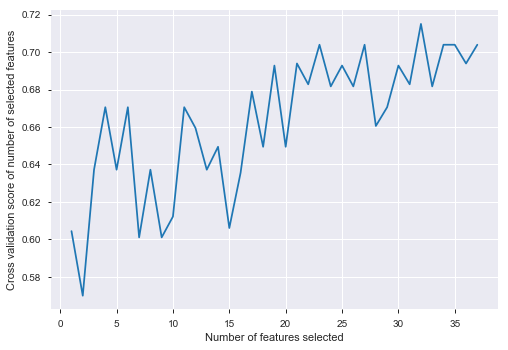

In [151]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Tree based feature selection and random forest classification¶

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature ranking:
1. feature 21 (0.113311)
2. feature 31 (0.092096)
3. feature 17 (0.069277)
4. feature 22 (0.063077)
5. feature 29 (0.053355)
6. feature 16 (0.051218)
7. feature 14 (0.045857)
8. feature 24 (0.038184)
9. feature 10 (0.036467)
10. feature 9 (0.033912)
11. feature 0 (0.031708)
12. feature 1 (0.031032)
13. feature 15 (0.028943)
14. feature 2 (0.028456)
15. feature 3 (0.024608)
16. feature 18 (0.024598)
17. feature 27 (0.024477)
18. feature 35 (0.023904)
19. feature 30 (0.020201)
20. feature 33 (0.020149)
21. feature 8 (0.019853)
22. feature 34 (0.018666)
23. feature 6 (0.017431)
24. feature 20 (0.017244)
25. feature 23 (0.015224)
26. feature 13 (0.011668)
27. feature 11 (0.010247)
28. feature 19 (0.009469)
29. feature 4 (0.005493)
30. feature 28 (0.004750)
31. feature 25 (0.004320)
32. feature 26 (0.003696)
33. feature 36 (0.002745)
34. feature 5 (0.002195)
35. feature 12 (0.001098)
36. feature 32 (0.001072)
37. feature 7 (0.000000)


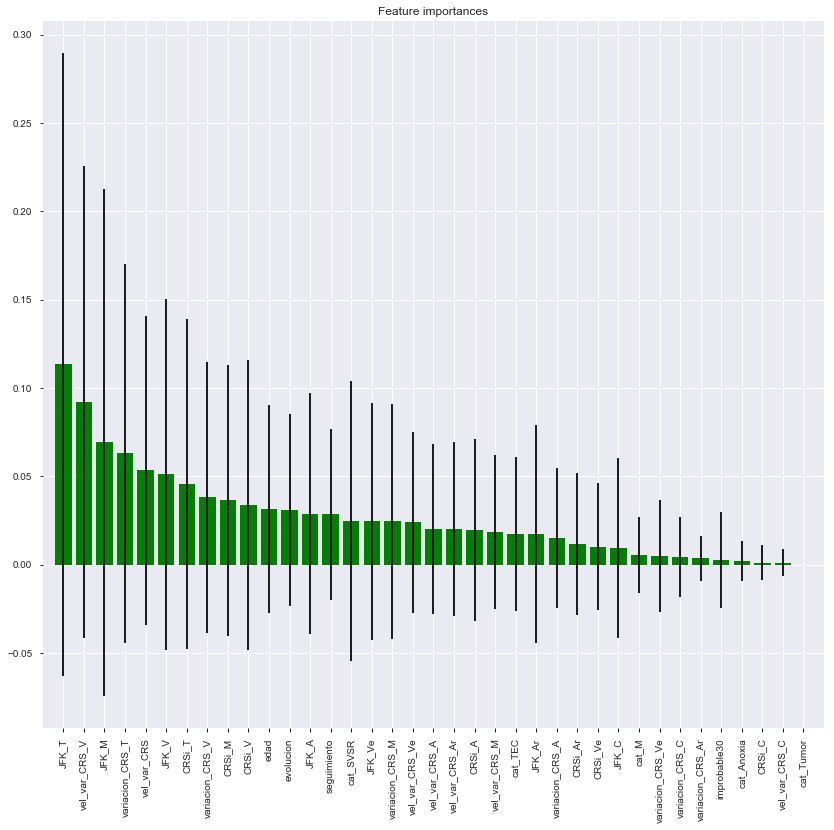

In [152]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

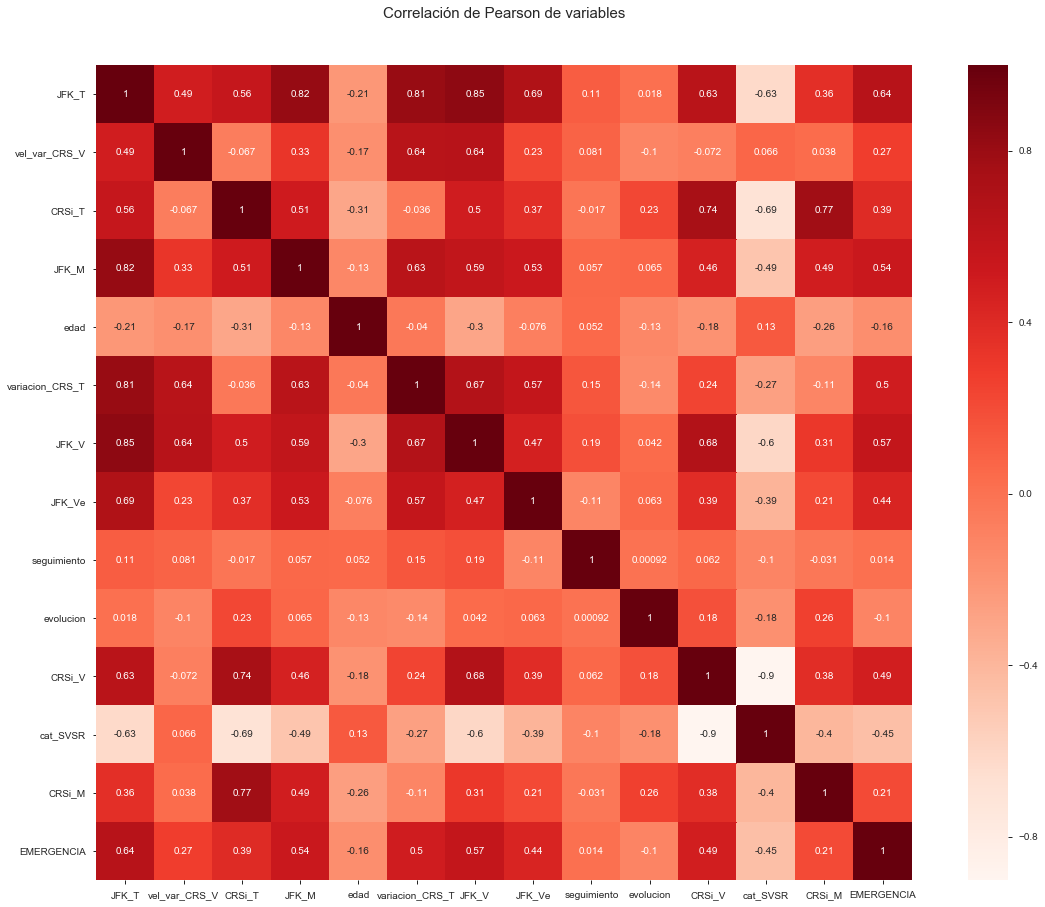

In [153]:
RFFS=df[['JFK_T','vel_var_CRS_V','CRSi_T','JFK_M','edad','variacion_CRS_T','JFK_V',
    'JFK_Ve','seguimiento','evolucion','CRSi_V','cat_SVSR','CRSi_M',
         'EMERGENCIA'
   ]]
#Heatmap de correlacion de PEARSON para variables de pacientes unicos que EMCS
cor = RFFS.corr(method='pearson')

#set(font_scale=1)
plt.figure(figsize=(20,15))
plt.title('Correlación de Pearson de variables', y=1.05, size=15)
sns.heatmap(cor, annot=True, square=True, cmap=plt.cm.Reds)
plt.show()

# Deteccion de outliers

In [154]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(n_jobs=-1, random_state=42)
isf.fit(X, y)

print(isf.score_samples(X))

[-0.41871505 -0.36884623 -0.5030422  -0.61307123 -0.3954928  -0.40285257
 -0.39060215 -0.43439647 -0.60090539 -0.44331434 -0.3898857  -0.41783944
 -0.42952977 -0.36575294 -0.41422475 -0.41382962 -0.38952833 -0.46184052
 -0.53743111 -0.49053093 -0.4152632  -0.40869064 -0.43799946 -0.5874094
 -0.39833037 -0.40872814 -0.41081206 -0.47161416 -0.39067679 -0.42359081
 -0.39542665 -0.38283293 -0.49136541 -0.45848281 -0.37004306 -0.39493811
 -0.43514418 -0.4368488  -0.57521966 -0.39338665 -0.5140999  -0.41090195
 -0.49291095 -0.45664554 -0.41835611 -0.58625372 -0.39210596 -0.37901634
 -0.38899751 -0.57440465 -0.37035745 -0.48534385 -0.46427132 -0.39685782
 -0.58786538 -0.37214817 -0.54016513 -0.4753239  -0.4298162  -0.38405447
 -0.58995168 -0.49583278 -0.49745129 -0.38092889 -0.40487884 -0.48890247
 -0.46250981 -0.49228054 -0.45421748 -0.52388277 -0.43411337 -0.4137775
 -0.39339703 -0.37256055 -0.39142219 -0.43157243 -0.48739147 -0.56514579
 -0.43870057 -0.37816208 -0.5576778  -0.54023996 -0.3

In [155]:
isf.predict(X)

array([ 1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1])

<div class="alert alert-info">
<h1><center><font color=darkblue> OPCIONES DE FS <font></center></h1>


</div>

In [156]:
stop

NameError: name 'stop' is not defined

# Opcion 1.A.
## RF Feature Selection

In [183]:
opcion1_A=df[['edad', 'edad_map', 
      'evolucion', 'seguimiento', 
      'cat_SVSR', 'cat_TEC',
      'CRSi_A', 'CRSi_V', 'CRSi_M', 'CRSi_T', 
      'JFK_A', 'JFK_V', 'JFK_M','JFK_Ve', 'JFK_C', 'JFK_T',
      'variacion_CRS_T', 'variacion_CRS_A','variacion_CRS_V', 'variacion_CRS_Ar', 'variacion_CRS_M',
      'variacion_CRS_Ve', 
      'vel_var_CRS', 'vel_var_CRS_A', 'vel_var_CRS_V','vel_var_CRS_Ar', 'vel_var_CRS_M', 'vel_var_CRS_Ve']]

# Opcion 1.B.
## RF Feature Selection sin edad_map

In [ ]:
opcion1_B=df[['edad', #'edad_map', 
      'evolucion', 'seguimiento', 
      'cat_SVSR', 'cat_TEC',
      'CRSi_A', 'CRSi_V', 'CRSi_M', 'CRSi_T', 
      'JFK_A', 'JFK_V', 'JFK_M','JFK_Ve', 'JFK_C', 'JFK_T',
      'variacion_CRS_T', 'variacion_CRS_A','variacion_CRS_V', 'variacion_CRS_Ar', 'variacion_CRS_M',
      'variacion_CRS_Ve', 
      'vel_var_CRS', 'vel_var_CRS_A', 'vel_var_CRS_V','vel_var_CRS_Ar', 'vel_var_CRS_M', 'vel_var_CRS_Ve']]

# Opcion 2
## DF con seleccion articifial con análisis multivariable (Regresion logísitica)
Guardado al final como metricas_artificial_LR

# Opcion 3 DF con selección manual de variables de Tabla 1 (diferencias estadisticamente significativas en grupos) 
Guardado al final como metricas_manual_1_tabla1

In [ ]:
#X=df[['JFK_T','evolucion','JFK_A','JFK_V','JFK_C','JFK_T','variacion_CRS_T','CRSi_A','variacion_CRS_A','vel_var_CRS']]
#y=df[['EMERGENCIA']]

# Opcion 4
## DF con selección manual de variables de correlacionadas (estadisticamente significativas)
Guardado al final como metricas_manual_2_correlaciones
#### * Nota: eliminé los features correlacionados (pearson) de los seleccionados por el RF (las variaciones estan mas correlacionados con la EMERGENCIA que las vel_var ver HeatMap)

## Opción 4.A: Elimino las vel_var, seguimiento y edad_map

In [ ]:
opcion4_A=df[['edad', 
      ### 'edad_map', 
      'evolucion', 
      ### 'seguimiento', 
      'cat_SVSR', 'cat_TEC',
      'CRSi_A', 'CRSi_V', 'CRSi_M', 'CRSi_T', 
      'JFK_A', 'JFK_V', 'JFK_M','JFK_Ve', 'JFK_C', 'JFK_T',
      'variacion_CRS_T', 'variacion_CRS_A','variacion_CRS_V', 'variacion_CRS_Ar', 'variacion_CRS_M',
      'variacion_CRS_Ve', 
      ###'vel_var_CRS', 'vel_var_CRS_A', 'vel_var_CRS_V','vel_var_CRS_Ar', 'vel_var_CRS_M', 'vel_var_CRS_Ve'
     ]]

## Opcion 4.B: Elimino las vel_val, seguimiento, edad_map y var        
* Notas:
 1. Todas las vel_var tienen menor correlacion con EMCS que sus respectivas variaciones
 2. Todas las var tienen menor correlacion con EMCS que sus respectivas puntuaciones JFK 

* var o JFK valorar: 
* Metodos
 1. Paso 1: correlacion entre si (para ver si elimino alguno de los dos)
 2. Paso 2: si la correlacion fue mayor a 0.5 voy al paso 2
 3. Paso 3: correlacion con EMCS

In [ ]:
opcion4_B=df[['edad', 
      ###'edad_map', 
      'evolucion', 
      ### 'seguimiento', 
      'cat_SVSR', 'cat_TEC',
      'CRSi_A', 'CRSi_V', 'CRSi_M', 'CRSi_T', 
      'JFK_A', 'JFK_V', 'JFK_M','JFK_Ve', 'JFK_C', 'JFK_T', # Todas JFK tienen correlaciones superiores a 0.6 con su Var
      'variacion_CRS_Ar', 
      ###'variacion_CRS_T', # Tiene una correlacion mas baja con EMCS que JFK_T
      ###'variacion_CRS_A', # Tiene una correlacion mas baja con EMCS que JFK_A
      ###'variacion_CRS_V',  # Tiene una correlacion mas baja con EMCS que JFK_V
      ###'variacion_CRS_M', # Tiene una correlacion mas baja con EMCS que JFK_M
      ###'variacion_CRS_Ve', # Tiene una correlacion mas baja con EMCS que JFK_Ve
      ###'vel_var_CRS', 'vel_var_CRS_A', 'vel_var_CRS_V','vel_var_CRS_Ar', 'vel_var_CRS_M', 'vel_var_CRS_Ve'
     ]]

## Opcion 4.C: Elimino las vel_val, seguimiento, edad_map y JFKs        

In [ ]:
opcion4_C=df[['edad', 
      ###'edad_map', 
      'evolucion', 
      ### 'seguimiento', 
      'cat_SVSR', 'cat_TEC',
      #'CRSi_A', 'CRSi_V', 'CRSi_M', 'CRSi_T', 
      #'JFK_A', 'JFK_V', 'JFK_M','JFK_Ve', 'JFK_C', 'JFK_T', # Todas JFK tienen correlaciones superiores a 0.6 con su Var
      'variacion_CRS_Ar', 
     'variacion_CRS_T', # Tiene una correlacion mas baja con EMCS que JFK_T
     'variacion_CRS_A', # Tiene una correlacion mas baja con EMCS que JFK_A
     'variacion_CRS_V',  # Tiene una correlacion mas baja con EMCS que JFK_V
     'variacion_CRS_M', # Tiene una correlacion mas baja con EMCS que JFK_M
     'variacion_CRS_Ve', # Tiene una correlacion mas baja con EMCS que JFK_Ve
      ###'vel_var_CRS', 'vel_var_CRS_A', 'vel_var_CRS_V','vel_var_CRS_Ar', 'vel_var_CRS_M', 'vel_var_CRS_Ve'
     ]]

# Opcion 5
## DF con selección manual RF + correlaciones


In [157]:
opcion5=df[['JFK_T','vel_var_CRS_V','CRSi_T','JFK_M','edad','variacion_CRS_T','JFK_V',
    'JFK_Ve','seguimiento','evolucion','CRSi_V','cat_SVSR','CRSi_M',
      ]]

# Separacion del DF seleccionado

In [184]:
X=opcion1_A
y=df[['EMERGENCIA']]

In [185]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

print('Tamaño del DF seleccionado')
print(df.shape)
print('Tamaño del conjunto de  X Entrenamiento')
print(X_train.shape)
print('Tamaño del conjunto de  y Entrenamiento')
print(y_train.shape)
print('Tamaño del conjunto de X Test')
print(X_test.shape)
print('Tamaño del conjunto de y Test')
print(y_test.shape)

Tamaño del DF seleccionado
(90, 93)
Tamaño del conjunto de  X Entrenamiento
(63, 28)
Tamaño del conjunto de  y Entrenamiento
(63, 1)
Tamaño del conjunto de X Test
(27, 28)
Tamaño del conjunto de y Test
(27, 1)


<div class="alert alert-info">
<h1><center><font color=darkblue> GRIDSEARCH ALL MODELS <font></center></h1>


</div>

In [160]:
import warnings
warnings.filterwarnings("ignore")

### Set EstimatorHelper

In [190]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=5, n_jobs=3, verbose=1, scoring='accuracy', refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring='accuracy', refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        modelss= []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

### Run EstimatorHelper

In [210]:
random_state=42

models1 = { 
    'RandomForestClassifier': RandomForestClassifier(random_state=random_state),
    'Support Vector Machine': SVC(random_state=random_state),
    'DecisionTreeClassifier':DecisionTreeClassifier(random_state=random_state),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression':LogisticRegression(random_state=random_state)
                }

params1 = { 
    'RandomForestClassifier': [
        {'criterion': ['gini', 'entropy'],'n_estimators': [1,2,3,4,5,10,20],
         'max_depth': [1,2,3,4,5, 8, 15, 20]},
    ],
    'Support Vector Machine': [
        {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
        {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.0001,0.001, 0.01, 0.1,1, 10]}
    ],
    'DecisionTreeClassifier':[
        {'criterion': ['gini', 'entropy'],'max_depth': [1,2,3,4,5,10,20]}
    ],
    'KNeighborsClassifier':[
        {'n_neighbors': [2,4,8,16]}
    ],
    'LogisticRegression':[
        {'penalty': ['l2','l1'],"C": np.logspace(0, 2, 10)},
        {'penalty': ['l2'],"C": np.logspace(0, 2, 10),"solver":['newton-cg','saga','sag','liblinear']} ##This solvers don't allow L1 penalty
    ] 
}


#Run GRidsearch
helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X_train, y_train, scoring=('balanced_accuracy'), n_jobs=1) # RECALL=SENSITIVITY

#Create report
helper_report=helper1.score_summary(sort_by='max_score')
helper_report

Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Running GridSearchCV for Support Vector Machine.
Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Running GridSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Running GridSearchCV for KNeighborsClassifier.
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Running GridSearchCV for LogisticRegression.
Fitting 5 folds for each of 60 candidates, totalling 300 fits
RandomForestClassifier
Support Vector Machine
DecisionTreeClassifier
KNeighborsClassifier
LogisticRegression


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    4.9s finished


,estimator,min_score,mean_score,max_score,std_score,C,criterion,gamma,kernel,max_depth,n_estimators,n_neighbors,penalty,solver
101,RandomForestClassifier,0.538462,0.780769,1,0.149753,NaN,entropy,NaN,NaN,15,4,NaN,NaN,NaN
23,RandomForestClassifier,0.538462,0.779487,1,0.16021,NaN,gini,NaN,NaN,4,3,NaN,NaN,NaN
107,RandomForestClassifier,0.538462,0.810256,1,0.183185,NaN,entropy,NaN,NaN,20,3,NaN,NaN,NaN
76,RandomForestClassifier,0.692308,0.828205,1,0.122863,NaN,entropy,NaN,NaN,3,20,NaN,NaN,NaN
78,RandomForestClassifier,0.461538,0.778205,1,0.17772,NaN,entropy,NaN,NaN,4,2,NaN,NaN,NaN
103,RandomForestClassifier,0.538462,0.779487,1,0.167434,NaN,entropy,NaN,NaN,15,10,NaN,NaN,NaN
30,RandomForestClassifier,0.538462,0.766667,1,0.167434,NaN,gini,NaN,NaN,5,3,NaN,NaN,NaN
102,RandomForestClassifier,0.461538,0.762821,1,0.189726,NaN,entropy,NaN,NaN,15,5,NaN,NaN,NaN
79,RandomForestClassifier,0.538462,0.794872,1,0.169308,NaN,entropy,NaN,NaN,4,3,NaN,NaN,NaN
100,RandomForestClassifier,0.538462,0.810256,1,0.183185,NaN,entropy,NaN,NaN,15,3,NaN,NaN,NaN


# Gridsearch Actual

In [211]:
best_helpers_report=helper_report.drop_duplicates(subset='estimator', keep='first')
best_helpers_report

,estimator,min_score,mean_score,max_score,std_score,C,criterion,gamma,kernel,max_depth,n_estimators,n_neighbors,penalty,solver
101,RandomForestClassifier,0.538462,0.780769,1,0.149753,NaN,entropy,NaN,NaN,15,4,NaN,NaN,NaN
210,LogisticRegression,0.461538,0.732051,1,0.190522,59.9484,NaN,NaN,NaN,NaN,NaN,NaN,l2,newton-cg
115,Support Vector Machine,0.461538,0.716667,1,0.190003,1000,NaN,NaN,linear,NaN,NaN,NaN,NaN,NaN
148,DecisionTreeClassifier,0.692308,0.761538,0.923077,0.08479,NaN,entropy,NaN,NaN,2,NaN,NaN,NaN,NaN
155,KNeighborsClassifier,0.692308,0.746154,0.846154,0.0562644,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN


In [ ]:
best_helpers_report['FS']='Opcion 4.C'

In [ ]:
best_helpers_report=best_helpers_report[['FS','estimator', 'min_score', 'mean_score', 'max_score', 'std_score', 'C',
       'criterion', 'gamma', 'kernel', 'max_depth', 'n_estimators',
       'n_neighbors', 'penalty', 'solver']]
best_helpers_report['Scoring']='balanced_acc'
best_helpers_report['Sorted']='max_score'
best_helpers_report

# Opcion 1.A.
## Gridsearch RF FS
 1 . sort_by: balanced_accuracy
 
 2 . scoring: max_score

In [232]:
#Guardar DF
#best_helpers_report.to_excel('1_A_best_helpers_report.xlsx')
best_helpers_report1A=pd.read_excel('1_A_best_helpers_report.xlsx', index_col=0)
best_helpers_report1A

,FS,estimator,min_score,mean_score,max_score,std_score,C,criterion,gamma,kernel,max_depth,n_estimators,n_neighbors,penalty,solver,Scoring,Sorted
99,Opcion 1.A,Support Vector Machine,0.461538,0.716667,1.000000,0.190003,1000.000000,NaN,NaN,linear,NaN,NaN,NaN,NaN,NaN,balanced_acc,max_score
180,Opcion 1.A,LogisticRegression,0.307692,0.670513,1.000000,0.227166,4.641589,NaN,NaN,NaN,NaN,NaN,NaN,l2,newton-cg,balanced_acc,max_score
65,Opcion 1.A,RandomForestClassifier,0.538462,0.779487,1.000000,0.167434,NaN,entropy,NaN,NaN,15.0,10.0,NaN,NaN,NaN,balanced_acc,max_score
136,Opcion 1.A,DecisionTreeClassifier,0.615385,0.778205,0.923077,0.125850,NaN,entropy,NaN,NaN,5.0,NaN,NaN,NaN,NaN,balanced_acc,max_score
145,Opcion 1.A,KNeighborsClassifier,0.692308,0.746154,0.846154,0.056264,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,balanced_acc,max_score


# Opcion 1.B.
## Gridsearch RF FS
 1 . sort_by: balanced_accuracy
 
 2 . scoring: max_score

In [233]:
#Guardar DF
#best_helpers_report.to_excel('1_B_best_helpers_report.xlsx')
best_helpers_report1B=pd.read_excel('1_B_best_helpers_report.xlsx', index_col=0)

# Opcion 4A
 1 . sort_by: balanced_accuracy
 
 2 . scoring: max_score

In [234]:
#Guardar DF
#best_helpers_report.to_excel('4_A_best_helpers_report.xlsx')
best_helpers_report4A=pd.read_excel('4_A_best_helpers_report.xlsx', index_col=0)

# Opcion 4B
 1 . sort_by: balanced_accuracy
 
 2 . scoring: max_score

In [235]:
#Guardar DF
#best_helpers_report.to_excel('4_B_best_helpers_report.xlsx')
best_helpers_report4B=pd.read_excel('4_B_best_helpers_report.xlsx', index_col=0)

# Opcion 4C
 1 . sort_by: balanced_accuracy
 
 2 . scoring: max_score

In [236]:
#Guardar DF
#best_helpers_report.to_excel('4_C_best_helpers_report.xlsx')
best_helpers_report4C=pd.read_excel('4_C_best_helpers_report.xlsx', index_col=0)
best_helpers_report4C

,FS,estimator,min_score,mean_score,max_score,std_score,C,criterion,gamma,kernel,max_depth,n_estimators,n_neighbors,penalty,solver,Scoring,Sorted
99,Opcion 4.C,Support Vector Machine,0.538462,0.750000,0.916667,0.128972,1000.000000,NaN,NaN,linear,NaN,NaN,NaN,NaN,NaN,balanced_acc,max_score
162,Opcion 4.C,LogisticRegression,0.615385,0.733333,0.916667,0.101160,35.938137,NaN,NaN,NaN,NaN,NaN,NaN,l2,NaN,balanced_acc,max_score
57,Opcion 4.C,RandomForestClassifier,0.615385,0.747436,0.916667,0.103489,NaN,entropy,NaN,NaN,8.0,10.0,NaN,NaN,NaN,balanced_acc,max_score
133,Opcion 4.C,DecisionTreeClassifier,0.500000,0.648718,0.769231,0.089413,NaN,gini,NaN,NaN,30.0,NaN,NaN,NaN,NaN,balanced_acc,max_score
147,Opcion 4.C,KNeighborsClassifier,0.692308,0.746154,0.769231,0.028263,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,balanced_acc,max_score


# Concatenar Reports

In [237]:
all_reports = pd.concat([best_helpers_report1A,
                         best_helpers_report1B,
                         best_helpers_report4A,
                         best_helpers_report4B,
                         best_helpers_report4C,
                        ])

In [238]:
all_reports=all_reports[['FS', 'estimator', 'C', 'criterion', 'gamma', 'kernel', 'max_depth', 'n_estimators',
       'n_neighbors', 'penalty', 'solver', 'min_score', 'mean_score', 'max_score', 'std_score','Scoring', 'Sorted']]
all_reports

,FS,estimator,C,criterion,gamma,kernel,max_depth,n_estimators,n_neighbors,penalty,solver,min_score,mean_score,max_score,std_score,Scoring,Sorted
99,Opcion 1.A,Support Vector Machine,1000.000000,NaN,NaN,linear,NaN,NaN,NaN,NaN,NaN,0.461538,0.716667,1.000000,0.190003,balanced_acc,max_score
180,Opcion 1.A,LogisticRegression,4.641589,NaN,NaN,NaN,NaN,NaN,NaN,l2,newton-cg,0.307692,0.670513,1.000000,0.227166,balanced_acc,max_score
65,Opcion 1.A,RandomForestClassifier,NaN,entropy,NaN,NaN,15.0,10.0,NaN,NaN,NaN,0.538462,0.779487,1.000000,0.167434,balanced_acc,max_score
136,Opcion 1.A,DecisionTreeClassifier,NaN,entropy,NaN,NaN,5.0,NaN,NaN,NaN,NaN,0.615385,0.778205,0.923077,0.125850,balanced_acc,max_score
145,Opcion 1.A,KNeighborsClassifier,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0.692308,0.746154,0.846154,0.056264,balanced_acc,max_score
60,Opcion 1.B,RandomForestClassifier,NaN,entropy,NaN,NaN,8.0,40.0,NaN,NaN,NaN,0.615385,0.779487,1.000000,0.136260,balanced_acc,max_score
196,Opcion 1.B,LogisticRegression,35.938137,NaN,NaN,NaN,NaN,NaN,NaN,l2,newton-cg,0.384615,0.716667,1.000000,0.213468,balanced_acc,max_score
96,Opcion 1.B,Support Vector Machine,1.000000,NaN,NaN,linear,NaN,NaN,NaN,NaN,NaN,0.384615,0.717949,1.000000,0.205128,balanced_acc,max_score
143,Opcion 1.B,DecisionTreeClassifier,NaN,entropy,NaN,NaN,100.0,NaN,NaN,NaN,NaN,0.538462,0.680769,0.846154,0.114124,balanced_acc,max_score
145,Opcion 1.B,KNeighborsClassifier,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0.692308,0.746154,0.846154,0.056264,balanced_acc,max_score


<div class="alert alert-info">
<h1><center><font color=darkblue> DEFINICION DEL DF <font></center></h1>


</div>

In [ ]:
#X=opcion4_C
#y=df[['EMERGENCIA']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

print('Tamaño del DF seleccionado')
print(df.shape)
print('Tamaño del conjunto de  X Entrenamiento')
print(X_train.shape)
print('Tamaño del conjunto de  y Entrenamiento')
print(y_train.shape)
print('Tamaño del conjunto de X Test')
print(X_test.shape)
print('Tamaño del conjunto de y Test')
print(y_test.shape)

In [ ]:
df.EMERGENCIA.sum()#groupby(by='EMERGENCIA').sum()

<div class="alert alert-info">
<h1><center><font color=darkblue> VALIDACION CONJUNTO TEST <font></center></h1>


</div>

In [225]:
best_helpers_report

,estimator,min_score,mean_score,max_score,std_score,C,criterion,gamma,kernel,max_depth,n_estimators,n_neighbors,penalty,solver
101,RandomForestClassifier,0.538462,0.780769,1,0.149753,NaN,entropy,NaN,NaN,15,4,NaN,NaN,NaN
210,LogisticRegression,0.461538,0.732051,1,0.190522,59.9484,NaN,NaN,NaN,NaN,NaN,NaN,l2,newton-cg
115,Support Vector Machine,0.461538,0.716667,1,0.190003,1000,NaN,NaN,linear,NaN,NaN,NaN,NaN,NaN
148,DecisionTreeClassifier,0.692308,0.761538,0.923077,0.08479,NaN,entropy,NaN,NaN,2,NaN,NaN,NaN,NaN
155,KNeighborsClassifier,0.692308,0.746154,0.846154,0.0562644,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN


In [246]:
best_helpers_report.estimator

AttributeError: 'DataFrame' object has no attribute 'estimator0'

In [224]:
best_helpers_report.set_index('estimator')
df_transposed = best_helpers_report.transpose()
Dic = df_transposed.to_dict('records')
Dic

In [231]:
best_helpers_report.set_index('estimator').stack().groupby(by='estimator',level=0).agg(list).to_dict()

{'RandomForestClassifier': [0.5384615384615384,
  0.7807692307692308,
  1.0,
  0.1497532487225522,
  'entropy',
  15,
  4],
 'LogisticRegression': [0.46153846153846156,
  0.7320512820512821,
  1.0,
  0.19052162039240947,
  59.94842503189409,
  'l2',
  'newton-cg'],
 'Support Vector Machine': [0.46153846153846156,
  0.7166666666666667,
  1.0,
  0.19000328728254215,
  1000,
  'linear'],
 'DecisionTreeClassifier': [0.6923076923076923,
  0.7615384615384615,
  0.9230769230769231,
  0.08479002955787926,
  'entropy',
  2],
 'KNeighborsClassifier': [0.6923076923076923,
  0.7461538461538462,
  0.8461538461538461,
  0.05626438014741459,
  4]}

In [213]:
#Training multiple classifiers and recording the results
### https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score

######################################################################################################################
##################################################### Logistic Regression ###########################################
model1=LogisticRegression(random_state=42, n_jobs=2, 
                          C= 7.74264, 
                          penalty= 'l2', 
                          solver='newton-cg', 
                          )

###################################################### Naive Bayes ##################################################
model2=GaussianNB()

###################################################### KNN ##########################################################
model3=KNeighborsClassifier(weights='uniform', algorithm='auto', leaf_size=30, p=2,metric='minkowski', 
                            metric_params=None, n_jobs=2,
                            n_neighbors=4
                           )

#################################################### Decision Tree ##################################################
model4=DecisionTreeClassifier(random_state=42, 
                              criterion='entropy', 
                              max_depth=2
                             )
#################################################### Support Vector Machine #########################################
model5=SVC(random_state=42, probability=True, 
           C=1000, 
           kernel='linear',
           #gamma=0.0001
          )

#################################################### Random Forrest #################################################
model6=RandomForestClassifier(random_state=42,  n_jobs = 2,
                              criterion='gini', 
                              max_depth=4, 
                              n_estimators=3
                             )


#####################################################################################################################
#####################################################################################################################

# Instantiate the classfiers and make a list
classifiers = [model1, 
               model2, 
               model3, 
               model4,
               model5,
               model6]
model_dict = {}

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for n,cls in enumerate(classifiers):
    #Gridsearh
    
    model = cls.fit(X_train, y_train)
    model_dict[f"{cls.__class__.__name__}_{n}"]=[model,X_train.dtypes.to_dict()]
    yproba = model.predict_proba(X_test)[::,1]
    # column 0: predicted probability that each observation is a member of class 0
    # column 1: predicted probability that each observation is a member of class 1
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':np.around(fpr, decimals=2), 
                                        'tpr':np.around(tpr, decimals=2), 
                                        'auc':np.around(auc, decimals=2), 
                                       }, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

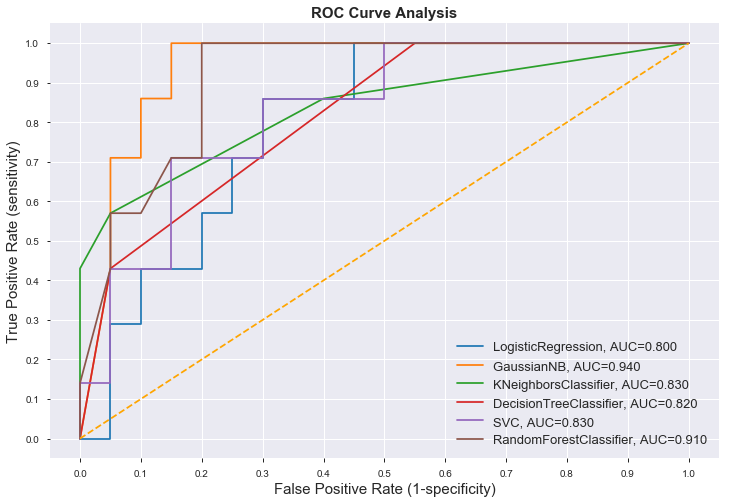

In [214]:
#model_dict
#model1_dic=list(model_dict.values())[0]
#result_table

fig = plt.figure(figsize=(12,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate (1-specificity)", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate (sensitivity)", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#matplotlib.pyplot.savefig('ROC1.jpg')

### Metrics

In [215]:
# Define a result table as a DataFrame
conf_metrics = pd.DataFrame(columns=['classifiers', 
                                     'Accuracy',
                                     'AUC',
                                     'Sensitivity',
                                     'Specificity',
                                     'PPV',
                                     'NPV',
                      #               'Positive Likelihood Ratio',
                       #              'Negative likelihood Ratio',
                                     'Precision',
                                     'f_1 Score',
                                     'Miss-Classification',
                                     'TP',
                                     'TN',
                                     'FP',
                                     'FN'])

# Train the models and record the results
for cls in classifiers:
    
    # Selec model
    model = cls.fit(X_train, y_train)
    print(model)
    
    # Predict binary clasification with one of the models
    y_pred= model.predict(X_test)

    # Create confusion matrix
    from sklearn.metrics import confusion_matrix
    conf_matrix=confusion_matrix(y_test, y_pred)

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    # calculate the sensitivity
    conf_sensitivity = (float (TP) / float(TP + FN))
    # calculate the specificity
    conf_specificity = (float (TN) / float(TN + FP))
    # calculate precision
    conf_precision = (float (TN) / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    
    # calculate Positive Predictive Value
  #  PPV = (float(TP) / float(TP+FP))
    # calculate Negative Predictive Value
    NPV = (float(TN) / float(TN+FN))

#LIKELIHOODS RATIOS    
    # calculate Positve Likelihood Ratio
 #   positiveLR = conf_sensitivity/(1-conf_specificity)
    # calculate Negative Likelihood Ratio
 #   negativeLR = (1-conf_sensitivity)/conf_specificity
    
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    print(f'Positive Predictive Value: {round(PPV,2)}')
    print(f'Negative Predictive Value: {round(NPV,2)}')
#    print(f'Positive Likelihood Ratio: {round(positiveLR,2)}')
#    print(f'Negative likelihood Ratio: {round(negativeLR,2)}')
    print()
    print()

    
    # AUC
    yproba = model.predict_proba(X_test)[::,1]
    # column 0: predicted probability that each observation is a member of class 0
    # column 1: predicted probability that each observation is a member of class 1
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    print('AUC',auc)
    
    print('-'*115)
    print()
    print()


    
    

    conf_metrics = conf_metrics.append({'classifiers':cls.__class__.__name__,
                                        'Accuracy': round(conf_accuracy,2),
                                        'AUC': round(auc,2), 
                                        'Sensitivity': round(conf_sensitivity,2),
                                        'Specificity': round(conf_specificity,2),
                                        'PPV': round(PPV,2),
                                        'NPV': round(NPV,2),
                           #             'Positive Likelihood Ratio': round(positiveLR,2),
                           #             'Negative likelihood Ratio': round(negativeLR,2),
                                        'Precision': round(conf_precision,2),
                                        'f_1 Score': round(conf_f1,2),
                                        'Miss-Classification': round(conf_misclassification,2),
                                        'TP': TP,
                                        'TN': TN,
                                        'FP': FP,
                                        'FN': FN}, ignore_index=True)
# Transpose index and columns
#conf_metrics=conf_metrics.T
conf_metrics

LogisticRegression(C=7.74264, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=2, penalty='l2', random_state=42,
                   solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)
True Positives: 5
True Negatives: 14
False Positives: 6
False Negatives: 2
--------------------------------------------------
Accuracy: 0.7
Mis-Classification: 0.3
Sensitivity: 0.71
Specificity: 0.7
Precision: 0.7
f_1 Score: 0.71
Positive Predictive Value: 1.0
Negative Predictive Value: 0.88


AUC 0.8
-------------------------------------------------------------------------------------------------------------------


GaussianNB(priors=None, var_smoothing=1e-09)
True Positives: 6
True Negatives: 17
False Positives: 3
False Negatives: 1
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.86
Specificity: 0.85
Precision: 0.85
f_1 Sc

,classifiers,Accuracy,AUC,Sensitivity,Specificity,PPV,NPV,Precision,f_1 Score,Miss-Classification,TP,TN,FP,FN
0,LogisticRegression,0.70,0.80,0.71,0.70,1.0,0.88,0.70,0.71,0.30,5,14,6,2
1,GaussianNB,0.85,0.94,0.86,0.85,1.0,0.94,0.85,0.85,0.15,6,17,3,1
2,KNeighborsClassifier,0.85,0.83,0.43,1.00,1.0,0.83,1.00,0.60,0.15,3,20,0,4
3,DecisionTreeClassifier,0.81,0.82,0.43,0.95,1.0,0.83,0.95,0.59,0.19,3,19,1,4
4,SVC,0.78,0.83,0.71,0.80,1.0,0.89,0.80,0.75,0.22,5,16,4,2
5,RandomForestClassifier,0.78,0.91,0.71,0.80,1.0,0.89,0.80,0.75,0.22,5,16,4,2


In [216]:
# Train the models and record the results
for cls in classifiers:
    
    # Selec model
    model = cls.fit(X_train, y_train)
    print(model)
    
    # Predict binary clasification with one of the models
    y_pred= model.predict(X_train)

    # Create confusion matrix
    from sklearn.metrics import confusion_matrix
    conf_matrix=confusion_matrix(y_train, y_pred)

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    # calculate the sensitivity
    conf_sensitivity = (float (TP) / float(TP + FN))
    # calculate the specificity
    conf_specificity = (float (TN) / float(TN + FP))
    # calculate precision
    conf_precision = (float (TN) / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    
    # calculate Positive Predictive Value
    PPV = (float(TP) / float(TP+FP))
    # calculate Negative Predictive Value
    NPV = (float(TN) / float(TN+FN))

#LIKELIHOODS RATIOS    
    # calculate Positve Likelihood Ratio
 #   positiveLR = conf_sensitivity/(1-conf_specificity)
    # calculate Negative Likelihood Ratio
 #   negativeLR = (1-conf_sensitivity)/conf_specificity
    
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    print(f'Positive Predictive Value: {round(PPV,2)}')
    print(f'Negative Predictive Value: {round(NPV,2)}')
#    print(f'Positive Likelihood Ratio: {round(positiveLR,2)}')
#    print(f'Negative likelihood Ratio: {round(negativeLR,2)}')
    print()
    print()

    
    # AUC
    yproba = model.predict_proba(X_train)[::,1]
    # column 0: predicted probability that each observation is a member of class 0
    # column 1: predicted probability that each observation is a member of class 1
    fpr, tpr, _ = roc_curve(y_train,  yproba)
    auc = roc_auc_score(y_train, yproba)
    print('AUC',auc)
    
    print('-'*115)
    print()
    print()


    
    

    conf_metrics = conf_metrics.append({'classifiers':cls.__class__.__name__,
                                        'Accuracy': round(conf_accuracy,2),
                                        'AUC': round(auc,2), 
                                        'Sensitivity': round(conf_sensitivity,2),
                                        'Specificity': round(conf_specificity,2),
                                        'PPV': round(PPV,2),
                                        'NPV': round(NPV,2),
                           #             'Positive Likelihood Ratio': round(positiveLR,2),
                           #             'Negative likelihood Ratio': round(negativeLR,2),
                                        'Precision': round(conf_precision,2),
                                        'f_1 Score': round(conf_f1,2),
                                        'Miss-Classification': round(conf_misclassification,2),
                                        'TP': TP,
                                        'TN': TN,
                                        'FP': FP,
                                        'FN': FN}, ignore_index=True)
# Transpose index and columns
#conf_metrics=conf_metrics.T
conf_metrics

LogisticRegression(C=7.74264, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=2, penalty='l2', random_state=42,
                   solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)
True Positives: 13
True Negatives: 46
False Positives: 1
False Negatives: 3
--------------------------------------------------
Accuracy: 0.94
Mis-Classification: 0.06
Sensitivity: 0.81
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.89
Positive Predictive Value: 0.93
Negative Predictive Value: 0.94


AUC 0.9800531914893617
-------------------------------------------------------------------------------------------------------------------


GaussianNB(priors=None, var_smoothing=1e-09)
True Positives: 10
True Negatives: 42
False Positives: 5
False Negatives: 6
--------------------------------------------------
Accuracy: 0.83
Mis-Classification: 0.17
Sensitivity: 0.62
Specificity: 0.89


,classifiers,Accuracy,AUC,Sensitivity,Specificity,PPV,NPV,Precision,f_1 Score,Miss-Classification,TP,TN,FP,FN
0,LogisticRegression,0.70,0.80,0.71,0.70,1.00,0.88,0.70,0.71,0.30,5,14,6,2
1,GaussianNB,0.85,0.94,0.86,0.85,1.00,0.94,0.85,0.85,0.15,6,17,3,1
2,KNeighborsClassifier,0.85,0.83,0.43,1.00,1.00,0.83,1.00,0.60,0.15,3,20,0,4
3,DecisionTreeClassifier,0.81,0.82,0.43,0.95,1.00,0.83,0.95,0.59,0.19,3,19,1,4
4,SVC,0.78,0.83,0.71,0.80,1.00,0.89,0.80,0.75,0.22,5,16,4,2
5,RandomForestClassifier,0.78,0.91,0.71,0.80,1.00,0.89,0.80,0.75,0.22,5,16,4,2
6,LogisticRegression,0.94,0.98,0.81,0.98,0.93,0.94,0.98,0.89,0.06,13,46,1,3
7,GaussianNB,0.83,0.88,0.62,0.89,0.67,0.88,0.89,0.74,0.17,10,42,5,6
8,KNeighborsClassifier,0.79,0.84,0.19,1.00,1.00,0.78,1.00,0.32,0.21,3,47,0,13
9,DecisionTreeClassifier,0.84,0.85,0.38,1.00,1.00,0.82,1.00,0.55,0.16,6,47,0,10


# Opción 1.A

In [172]:
#conf_metrics.to_excel('1A_metrics.xlsx')
metrics1A=pd.read_excel('1A_metrics.xlsx', index_col=0)
metrics1A['FS']='1.A'
#metrics1A['NF']=len(opcion1_A.columns)

# Opción 1.B

In [173]:
#conf_metrics.to_excel('1B_metrics.xlsx')
metrics1B=pd.read_excel('1B_metrics.xlsx', index_col=0)
metrics1B['FS']='1.B'
#metrics1B['NF']=len(opcion1_B.columns)

# Opción 4.A

In [174]:
#conf_metrics.to_excel('4A_metrics.xlsx')
metrics4A=pd.read_excel('4A_metrics.xlsx', index_col=0)
metrics4A['FS']='4.A'
#metrics4A['NF']=len(opcion4_A.columns)

# Opción 4.B

In [175]:
#conf_metrics.to_excel('4B_metrics.xlsx')
metrics4B=pd.read_excel('4B_metrics.xlsx', index_col=0)
metrics4B['FS']='4.B'
#metrics4B['NF']=len(opcion4_B.columns)

# Opción 4.C
No pude respetar el parametro KNN n_neighbors=16 porque las metrivas no funcionan porque una es una division por 0

In [176]:
#conf_metrics.to_excel('4C_metrics.xlsx')
metrics4C=pd.read_excel('4C_metrics.xlsx', index_col=0)
metrics4C['FS']='4.C'
#metrics4C['NF']=len(opcion4_C.columns)

# Total

In [177]:
metricas_total = pd.concat([metrics1A,metrics1B,metrics4A,metrics4B,metrics4C])
metricas_total=metricas_total.rename(columns={'classifiers':'estimator'})
metricas_total['estimator']=metricas_total['estimator'].map({'LogisticRegression':'LogisticRegression',
                                                         'GaussianNB':'GaussianNB',
                                                         'KNeighborsClassifier':'KNeighborsClassifier',
                                                         'DecisionTreeClassifier':'DecisionTreeClassifier',
                                                         'SVC':'Support Vector Machine',
                                                         'RandomForestClassifier':'RandomForestClassifier'})

In [178]:
#Ordenar sengun Sensibilidad y Especificidad
orden1=['Sensitivity','Specificity','Accuracy','AUC']
cols1=['FS',#'NF',
       'estimator', 'Sensitivity', 'Specificity','Accuracy', 'AUC','PPV', 'NPV', 'Precision', 'f_1 Score', 
      'Miss-Classification', 'TP','TN', 'FP', 'FN']

#Ordenar sengun Sensibilidad y Especificidad
orden2=['Accuracy','AUC']
cols2=['FS',#'NF',
       'estimator', 'Accuracy', 'AUC', 'Sensitivity', 'Specificity','PPV', 'NPV', 'Precision', 'f_1 Score', 
      'Miss-Classification', 'TP','TN', 'FP', 'FN']

metricas_mes1=metricas_total[cols1].sort_values(by=orden1, ascending=False)
metricas_mes1

#summary=pd.merge(metrics4C, best_helpers_report4C, how='outer', on=['estimator'])

,FS,estimator,Sensitivity,Specificity,Accuracy,AUC,PPV,NPV,Precision,f_1 Score,Miss-Classification,TP,TN,FP,FN
1,4.B,GaussianNB,0.86,0.90,0.89,0.94,0.75,0.95,0.90,0.88,0.11,6,18,2,1
5,1.A,RandomForestClassifier,0.86,0.90,0.89,0.88,0.75,0.95,0.90,0.88,0.11,6,18,2,1
1,4.A,GaussianNB,0.86,0.85,0.85,0.95,0.67,0.94,0.85,0.85,0.15,6,17,3,1
1,1.A,GaussianNB,0.86,0.85,0.85,0.94,0.67,0.94,0.85,0.85,0.15,6,17,3,1
1,1.B,GaussianNB,0.86,0.85,0.85,0.94,0.67,0.94,0.85,0.85,0.15,6,17,3,1
0,4.C,LogisticRegression,0.86,0.80,0.81,0.89,0.60,0.94,0.80,0.83,0.19,6,16,4,1
4,4.C,Support Vector Machine,0.86,0.75,0.78,0.91,0.55,0.94,0.75,0.80,0.22,6,15,5,1
1,4.C,GaussianNB,0.71,0.90,0.85,0.96,0.71,0.90,0.90,0.80,0.15,5,18,2,2
4,4.A,Support Vector Machine,0.71,0.90,0.85,0.92,0.71,0.90,0.90,0.80,0.15,5,18,2,2
5,4.B,RandomForestClassifier,0.71,0.85,0.81,0.87,0.62,0.89,0.85,0.78,0.19,5,17,3,2


<div class="alert alert-info">
<h1><center><font color=darkblue> RESULTADOS <font></center></h1>


</div>

### clase_18_regresion_resuelto

In [ ]:
y_train_pred_knn = model.predict(X_train_scal)
y_test_pred_knn = rgr_knn.predict(X_test_scal)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_knn))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_knn))

In [ ]:
plt.figure(figsize = (10,8))

plt.scatter(X_train[:,0], y_train, label = 'Datos Train')
plt.scatter(X_train[:,0], y_train_pred_knn, label = 'Prediccion Train')

plt.scatter(X_test[:,0], y_test, label = 'Datos Test')
plt.scatter(X_test[:,0], y_test_pred_knn, label = 'Prediccion Test')

plt.legend()
plt.show()